In [1]:

# coding: utf-8

# A minimum of three different kinds of graphs.  Thus, if you plotted S&P500, NASDAQ, and DJIA against trading day, that would not count as three kinds of graphs but one kind of graph (a stock index value versus time).  As another example, a graph of DJIA values versus time and another graph of DJIA as a percentage of mean versus time would count as two different kinds of graphs.

# In[12]:


"""Mark Conrad
    Programming Theory
    Attribution to open source Software Creators:
    Francois Chollet: https://github.com/fchollet/keras,
    TensorFlow: TensorFlow, the TensorFlow logo and any related marks are trademarks of Google Inc.
    Samir I repurposed his Keras code and made edits. 
    Special dependencies Keras, and TensorFlow, CLI installation: 
    $conda install keras tensorflow

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import keras
import tensorflow as tf
# os.chdir("data")
random_seed = 0
df = pd.read_csv("train/train.csv")


# In[14]:

Using TensorFlow backend.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


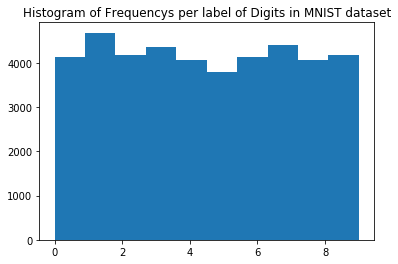

In [2]:
get_ipython().magic('matplotlib inline')
# 1 Here is a colorful menagerie of exploratory plots 
# Plot I
# # Distribution of outcomes
# The first if a histogram of the distribution of digit labels that we are trying to predict.
plt.figure(1)
plt.title("Histogram of Frequencys per label of Digits in MNIST dataset")
plt.hist(df["label"])
plt.legend()
plt.savefig("Histogram of Frequencys per label of Digits in MNIST dataset")


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


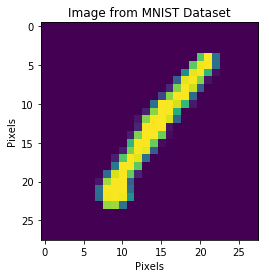

In [14]:
# # Plot II 
# # plot a sample from the input.  
# plt.figure(3)
# Credit to Yassine Ghouzam for correct reshaping procedure for visualization
data = np.array(df)
x = data[:,1:].reshape(-1,28,28,1)
plt.figure(2)
plt.title("Image from MNIST Dataset")
plt.imshow(x[0][:,:,0])
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.legend()
plt.savefig("Image from MNIST Dataset")


In [4]:

# 4


"""Here I want to demonstrate the ease by which anyone can make a deep learning model using Python and a (front-end) library called Keras. 

Deep learning has been popularized by Google researchers and I want to give you a primer to break through the buzz words and show you how you can do meaningful 
cutting-edge analysis in your current job or project.

I will use Keras (creator Francois Chollet who works at Google and TensorFlow Google's open source Deep Learning backend) to make my predictive model. 

Simply put, deep learning is like an upgraded form of linear regression analysis we have all done in statistics, however it can map to the non-linear 
functions that linear regression falls apart on. With Nvidia graphics cards we can apply deep learning to complex problems such that we can quickly teach this software to 
identify things in images with super-human accuracy. We will explore a model here with with only a few lines of code that achieves state of the art results of 5-10 years ago.  

Here is a model that can identify hand-written digits with ~99% accuracy."""


"Here I want to demonstrate the ease by which anyone can make a deep learning model using Python and a (front-end) library called Keras. \n\nDeep learning has been popularized by Google researchers and I want to give you a primer to break through the buzz words and show you how you can do meaningful \ncutting-edge analysis in your current job or project.\n\nI will use Keras (creator Francois Chollet who works at Google and TensorFlow Google's open source Deep Learning backend) to make my predictive model. \n\nSimply put, deep learning is like an upgraded form of linear regression analysis we have all done in statistics, however it can map to the non-linear \nfunctions that linear regression falls apart on. With Nvidia graphics cards we can apply deep learning to complex problems such that we can quickly teach this software to \nidentify things in images with super-human accuracy. We will explore a model here with with only a few lines of code that achieves state of the art results of 5

In [5]:
# 2

# # Defining our model -original design attributed to Yassine Ghouzam
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
# I can also use a pre-trained model on the Image Net Dataset with established weights that generalize to new examples quickly
# model = keras.applications.xception.Xception(include_top = False, weights = 'imagenet',input_tensor=(28,28,1), input_shape = (28,28,1), classes =10)
df.describe()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
input_array = np.array(df.iloc[1:])
norm_array = input_array/255.

In [7]:
y = np.array(data[:,0])
# Deep learning likes one-hot encoded vectors.
y = to_categorical(y)

In [8]:
# Optimizer:
# optimizer = Adam(lr=0.01, epsilon = 1e-08, decay = 0)
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

# We can dynamically change the learning rate if the accuracy does not improve, code courtesy of Yassine Ghouzam:
# learning_rate_reduction = ReduceLROnPlateau(monitor='acc', patience = 3, verbose =1, factor = 0.5, min_lr =0.00001)


batch_size = 128 # how many images per training iteration and updating weights with backprop


history = model.fit(x, y, batch_size=batch_size, epochs=30, verbose = 1 )


# Nvidia's GPUs speed up training taking advantage of parallelization in CUDA driver and optimization in the CUDNN deep learning core library.

Epoch 1/30
42000/42000 [==============================] - 11s - loss: 1.2956 - acc: 0.8173    
Epoch 2/30
42000/42000 [==============================] - 9s - loss: 0.1161 - acc: 0.9652     
Epoch 3/30
42000/42000 [==============================] - 9s - loss: 0.0815 - acc: 0.9754     
Epoch 4/30
42000/42000 [==============================] - 9s - loss: 0.0671 - acc: 0.9803     
Epoch 5/30
42000/42000 [==============================] - 9s - loss: 0.0592 - acc: 0.9822     
Epoch 6/30
42000/42000 [==============================] - 9s - loss: 0.0550 - acc: 0.9833     
Epoch 7/30
42000/42000 [==============================] - 9s - loss: 0.0480 - acc: 0.9848     
Epoch 8/30
42000/42000 [==============================] - 10s - loss: 0.0458 - acc: 0.9864    
Epoch 9/30
42000/42000 [==============================] - 9s - loss: 0.0455 - acc: 0.9859     
Epoch 10/30
42000/42000 [==============================] - 9s - loss: 0.0443 - acc: 0.9865     
Epoch 11/30
42000/42000 [========================

In [9]:
# history

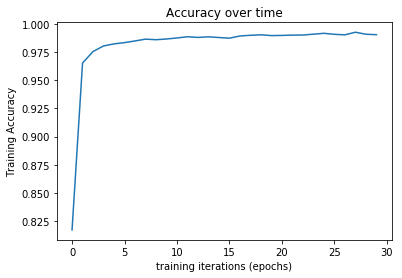

In [10]:
# 1 Continued...
plt.figure(3)
plt.title("Accuracy over time")
plt.plot(history.history['acc'], label = "Training Accuracy")
plt.xlabel("training iterations (epochs)")
plt.ylabel("Training Accuracy")
plt.savefig("training accuracy over time")

# Accuracy
Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
